**Important : make sure the size set here is the same than in pkl_to_train-test**

# Training

In [1]:
size = 224

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13688400659033483273
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6936788992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 839828951601441126
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070 Ti, pci bus id: 0000:1c:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#load train/test data
X_train =np.load('D:\\variables\\X_train_rgb.npy')
X_test =np.load('D:\\variables\\X_test_rgb.npy')
train_Y_one_hot =np.load('D:\\variables\\y_train_rgb.npy')
test_Y_one_hot =np.load('D:\\variables\\y_test_rgb.npy')

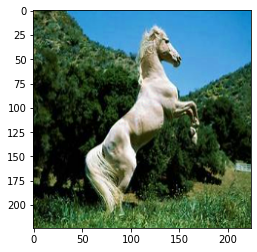

In [6]:
#impression image 
num = 26
img = X_train[num]
plt.imshow(img)

In [7]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

In [8]:
num_classes = train_Y_one_hot.shape[1]
print(num_classes)

10


In [9]:
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11, 11),strides=(4,4),activation='linear',input_shape=(size,size,X_train.shape[3])))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding='same'))
model.add(Conv2D(256, (5, 5), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding='same'))
model.add(Conv2D(384, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(384, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(256, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding='same'))
model.add(Flatten())
#reseau de neurone "classique" pour la deriere couche cachee
model.add(Dense(4096, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
#couche de sortie
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 23, 23, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                    

In [12]:
model.fit(X_train, train_Y_one_hot, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, test_Y_one_hot))

Epoch 1/30
164/164 [==============================] - 26s 113ms/step - loss: 51.9742 - accuracy: 0.1653 - val_loss: 2.1486 - val_accuracy: 0.2410
Epoch 2/30
164/164 [==============================] - 17s 104ms/step - loss: 2.1192 - accuracy: 0.2569 - val_loss: 2.1944 - val_accuracy: 0.1973
Epoch 3/30
164/164 [==============================] - 17s 104ms/step - loss: 1.9920 - accuracy: 0.3088 - val_loss: 1.9524 - val_accuracy: 0.3384
Epoch 4/30
164/164 [==============================] - 17s 104ms/step - loss: 1.9463 - accuracy: 0.3263 - val_loss: 1.8036 - val_accuracy: 0.3888
Epoch 5/30
164/164 [==============================] - 17s 106ms/step - loss: 1.8070 - accuracy: 0.3752 - val_loss: 1.7150 - val_accuracy: 0.4206
Epoch 6/30
164/164 [==============================] - 18s 107ms/step - loss: 1.7504 - accuracy: 0.3977 - val_loss: 1.6759 - val_accuracy: 0.4282
Epoch 7/30
164/164 [==============================] - 18s 107ms/step - loss: 1.6754 - accuracy: 0.4262 - val_loss: 1.6625 - val_a

Text(0.5, 0, 'epoch')

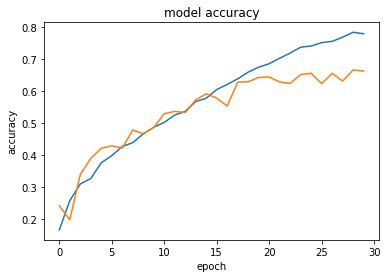

In [13]:
#graph accuracy vs val_accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

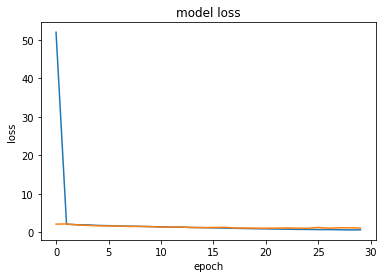

In [14]:
#graph loss vs val_loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [15]:
#save model
model.save('D:\\model_rgb.h5')